# 細かい調整

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['savefig.facecolor'] = 'white'  # jupyterでグラフ範囲以外の背景が透明になってる場合はやる．
import numpy as np

## フォントやフォントサイズ，線の太さを一括指定
`rcParams`で設定できる．  

数式のフォント

In [2]:
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

数式以外のフォント（凡例や目盛りの文字）

In [3]:
plt.rcParams["font.family"] = "Times New Roman"
#plt.rcParams["font.family"] = "DejaVu Serif"  # ubuntuにはTimes~が入っていない場合がある．そんときはこれ
plt.rcParams['font.size'] = 20  #フォントサイズ

線の太さ

In [4]:
plt.rcParams['lines.linewidth'] = 4  # 先の太さ

In [5]:
# データを用意
x = np.arange(0, 2*np.pi, 0.01)
y = np.sin(x)
y2 = np.cos(x)

## 数式の使用

凡例や軸ラベルにLaTeXスタイルの数式が使える．  
`$`で囲んだ文字列が数式とみなされる．  
```python
label = r'$数式にしたい文字列$'
```
Wordで数式使ったことがある人ならだいたい分かると思う．  
<br>
ギリシャ文字は先頭にバックスラッシュを入れる．  
例1 : <img src="https://latex.codecogs.com/svg.image?\omega" title="\omega" />  
```python
r'$\omega$'
```
<br>
標準は立体．斜体は`\it{文字}`で指定  
例2 : <img src="https://latex.codecogs.com/svg.image?x" title="x" />
```python
r'$\it{x}$'
```
<br>
上付き文字は`^{上付き文字}`，下付き文字は`_{下付き文字}`  
例3 : <img src=https://latex.codecogs.com/svg.image?x^{a}_{b}>  
```python
r'$it{x^{a}_{b}}$'
```

<br>
※`r'文字列'`は生文字列のこと．中でバックスラッシュが使用できる．  

(0.1, 0.9, 0.3, 1.0)

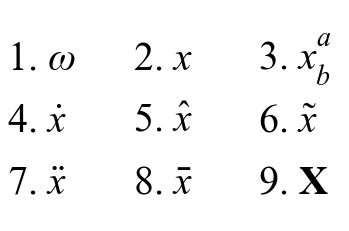

In [52]:
_size = 40
plt.text(0.1, 0.8, r"1. $\omega$", fontsize=_size)
plt.text(0.4, 0.8, r"2. $\it{x}$", fontsize=_size)
plt.text(0.7, 0.8, r"3. $\it{x^{a}_{b}}$", fontsize=_size)
plt.text(0.1, 0.6, r"4. $\dot{x}$", fontsize=_size)
plt.text(0.4, 0.6, r"5. $\hat{x}$", fontsize=_size)
plt.text(0.7, 0.6, r"6. $\tilde{x}$", fontsize=_size)
plt.text(0.1, 0.4, r"7. $\ddot{x}$", fontsize=_size)
plt.text(0.4, 0.4, r"8. $\bar{x}$", fontsize=_size)
plt.text(0.7, 0.4, r"9. $\bf{X}$", fontsize=_size)  # ベクトルはグラフにできないので使わないと思う
plt.xlim(0.1, 0.9); plt.ylim(0.3, 1); plt.axis("off")

### 使用例

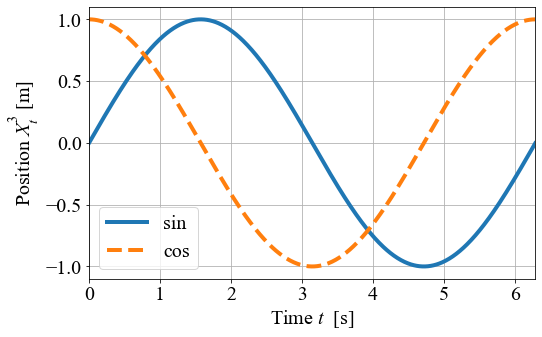

In [7]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(x, y, label="sin", linestyle="solid")
ax.plot(x, y2, label="cos", linestyle="dashed")
ax.set_xlabel(r'Time $\it{t}$  [s]')
ax.set_ylabel(r"Position $\it{X^3_t}$ [m]")
ax.set_xlim(0, 2*np.pi)
ax.grid()
ax.legend()

****
## さらに細かい調整
### 目盛り
`.set_xticks([ 目盛り値のリスト ])`と`.set_xticklabels([ 表示値 ])`を使う．  
目盛りの有効数字を揃えたいとき？に便利かも．  

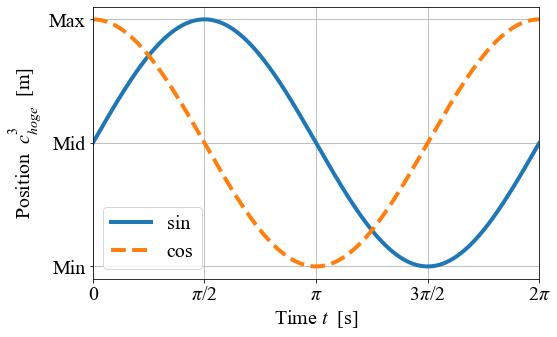

In [8]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(x, y, label="sin", linestyle="solid")
ax.plot(x, y2, label="cos", linestyle="dashed")
ax.set_xlabel(r'Time $\it{t}$  [s]')
ax.set_ylabel(r"Position  $\it{c^3_{hoge}}$  [m]")
ax.set_xlim(0, 2*np.pi)

ax.set_xticks([0, 1/2*np.pi, np.pi, 3/2*np.pi, 2*np.pi])  # 目盛り位置
ax.set_xticklabels(["0", r"$\pi$/2", r"$\pi$", r"3$\pi$/2", r"2$\pi$"])  # 目盛りの表示値．数値でも文字列でもOK．

ax.set_yticks([-1, 0, 1])
ax.set_yticklabels(["Min", "Mid", "Max"])

ax.grid()
ax.legend()

### 拡大図
`.zoomed_inset_axes()`を使うと図の中にプロットの一部を拡大したものを挿入できる．  
面倒なので別の図で用意したほうが良い気がする．  

In [9]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

In [10]:
# データを容易
x = np.linspace(0, 1, 10000)
y = 100*np.random.rand(10000) + np.exp(10*x)

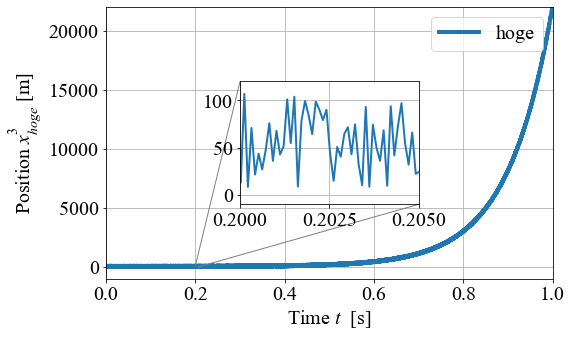

In [11]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(x, y, label="hoge")
ax.set_xlabel(r'Time $\it{t}$  [s]')
ax.set_ylabel(r"Position $\it{x^3_{hoge}}$ [m]")
ax.set_xlim(0, 1)
ax.set_ylim(-1000, 22000)

# 拡大図を容易
ax_zoom = zoomed_inset_axes(ax, zoom=80, loc='center')
ax_zoom.plot(x, y, linewidth=2)
ax_zoom.set_xlim(0.2, 0.205)
ax_zoom.set_ylim(-10, 120)
ax_zoom.grid()

# 吹き出しを容易
mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

ax.grid()
ax.legend()